In [1]:
from itertools import product, combinations
from collections import Counter
from IPython.display import display, Latex
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
vars = [2, 4, 6, 8]
mu = sum(vars)/4
dev = np.std(vars)
display(Latex(f'$\mu={mu}$'))
display(Latex(f'$\sigma={dev}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
np.sqrt((sum((np.array(vars)-mu)**2)/4))

2.23606797749979

In [4]:
np.sqrt((sum((np.array(vars)-mu)**2)/3))

2.581988897471611

In [ ]:
help(combinations)

Help on class combinations in module itertools:

class combinations(builtins.object)
 |  combinations(iterable, r)
 |  
 |  Return successive r-length combinations of elements in the iterable.
 |  
 |  combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [6]:
len(list(combinations(vars, 2)))

6

In [7]:
len(list(product(vars, repeat=2)))

16

In [8]:
list(product(vars, repeat=2))

[(2, 2),
 (2, 4),
 (2, 6),
 (2, 8),
 (4, 2),
 (4, 4),
 (4, 6),
 (4, 8),
 (6, 2),
 (6, 4),
 (6, 6),
 (6, 8),
 (8, 2),
 (8, 4),
 (8, 6),
 (8, 8)]

In [9]:
N = 2
amostras = list(product(vars, repeat=N))
medias = []

for a in amostras:
  medias.append(sum(a)/N)

medias

[2.0,
 3.0,
 4.0,
 5.0,
 3.0,
 4.0,
 5.0,
 6.0,
 4.0,
 5.0,
 6.0,
 7.0,
 5.0,
 6.0,
 7.0,
 8.0]

In [13]:
mu_amostral = sum(medias)/16
dev_amostral = np.std(medias)

display(Latex(f'$Media(X)={mu_amostral}$'))
display(Latex(f'$Var(X)={dev_amostral}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# SEM para amostra N=2
dev/np.sqrt(2)

1.5811388300841895

In [ ]:
Counter(medias)

Counter({2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 3, 7.0: 2, 8.0: 1})

<BarContainer object of 7 artists>

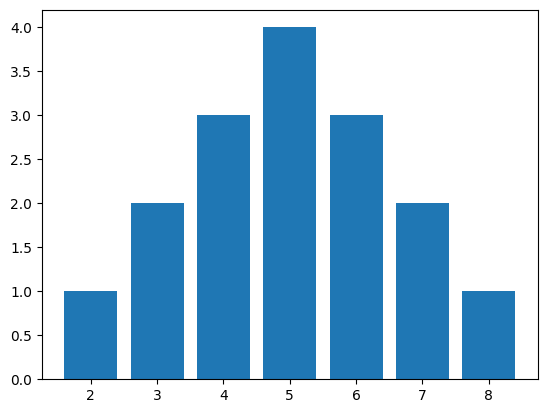

In [ ]:
plt.bar(Counter(medias).keys(), Counter(medias).values())

In [ ]:
from numpy.random import choice
import random

medias_amostrais = list(Counter(medias).keys())
freq_amostrais = np.array(list(Counter(medias).values()))

amostra1 = random.choices(population=medias_amostrais,
              weights=freq_amostrais,
              k=1000)

amostra = choice(medias_amostrais, 1000,
              p=freq_amostrais/freq_amostrais.sum())


(array([ 55., 130.,   0., 214.,   0., 246., 191.,   0., 109.,  55.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

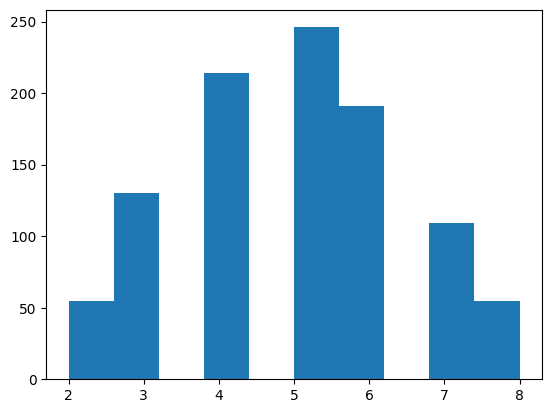

In [ ]:
plt.hist(amostra1)

(array([ 62., 122.,   0., 194.,   0., 254., 184.,   0., 121.,  63.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

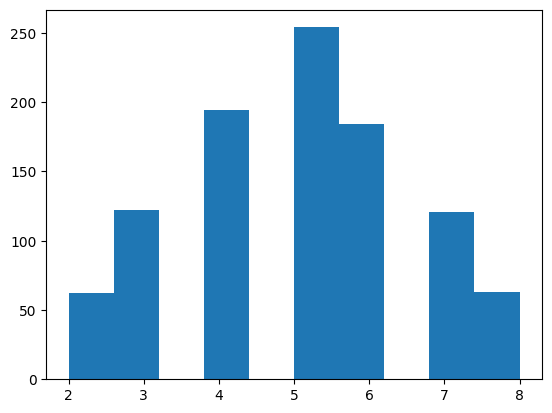

In [ ]:
plt.hist(amostra)

In [ ]:
freq_amostrais

array(dict_values([1, 2, 3, 4, 3, 2, 1]), dtype=object)

In [ ]:
5/np.sqrt(5)

2.23606797749979

In [ ]:
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

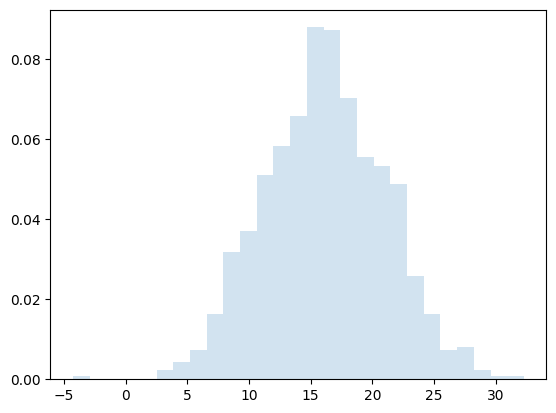

In [ ]:
rv = stats.norm(16, 5)

r = rv.rvs(size=1000)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
random.choices(r, k=5)

[22.159365253103616,
 16.588620370675272,
 15.244901321653456,
 19.48950875600346,
 19.441125225372538]

In [ ]:
#https://onlinestatbook.com/stat_sim/sampling_dist/index.html
import time
from IPython.display import clear_output

k = 5
s = []
for i in range(100):
  clear_output()
  s.append(np.mean(random.choices(r, k=5)))
  plt.hist(s)
  plt.show()
  plt.close()
  time.sleep(1)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7edec8b7e5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: 